## Part 1 of 3

This is the first of three notebooks which will cover our initial steps into creating our own neural network. The parts are as follows:

- Neural Network Structures and the Forward Pass
- Coding a Back Propagation
- Changes for Classification

## This notebook's topic: structure of a neural network for regression and the forward pass ##
 1. Motivation for neural networks
 2. Understanding the structure of neural networks
 3. Comparing a neural network to regression
 4. Input and output layer
 5. Hidden layers
 6. Weight initialization (only for first foward pass)
 7. Activations
 8. Overview of forward pass

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

np.random.seed(888)

range_for_demo = np.linspace(-5, 5, 100)

# Motivation #

As we progress further and further into a world where data is being collected at such a quick rate, we will need to better understand complex relationships in data. Luckily, in BADS, we already have quite a few great tools even for situations where relationships in our data are pretty complex. From logistic regressions to random forests, we can solve many problems already with our arsenal of machine learning algorithms. This course will focus on a specific method of computing complex data relations: the neural network.

## Types of problems
Neural networks are actually quite flexible algorithms. We will explore the reason for this as we explain how they work. For now, let's think about common problems we may need to solve which neural networks can help us with.

**Regression** is when we are trying to predict a continuous number. How much will this customer spend today? How much rain will fall today?

**Binary Classification** tries to predict which of two options is most likely. Eg. Will this customer spend money today (yes/no)? Will rain fall today (yes/no)?
 - The target variable can either be a single binary variable: the variable represents the probability of the event occurring (eg. one variable for purchase, no purchase is inferred as the inverse)
 - Or the variable can be two variables: the first being the probability of the non-event, the second being the probability of the event (eg. one variable for no purchase and one variable for purchase)

**Single Label Multi-Class Problems** tries to predict which of 3 or more options are most likely but only ONE class is possible. Eg. Is this image a cat, dog or bird?

**Multiple Label Multi-Class Problems** tries to predict which of 3 or more options are most likely and when multiple classes are possible. Eg. Which of these products will be purchased?

You will find that we can reframe almost every problem that we want to answer with a neural network into one of these 4 types of problems. We will begin by discussing regression, then move on to binary classification.

# Understanding the structure of neural networks

## Our underlying data relationships
### True Relationship
So, we have a regression problem. Let's formulate it again mathematically. We want to find some relationship between our true target $y$ and the inputs $x$. For each observation, we will input its individual $x$ values, multiply them with their respective coefficients and it will yield a prediction $\hat y$.

So, if we believe the relationship to be linear, the true relationship is:
$$ y = \beta_{0} + \beta_{1}X_{1}+  \beta_{2}X_{2} + ... + \beta_{k}X_{k} + e $$

In matrix notation, this will look like:

$$\begin{bmatrix}  y_{1}\\  y_{2}\\   \vdots\\ y_{n}\\ \end{bmatrix}=\begin{bmatrix} 1 & x_{11}&\ldots\ & x_{1,k}\\  1 & x_2\\  \vdots & \vdots\\  1 & x_n&\ldots\ & x_{n,k}\\ \end{bmatrix}\begin{bmatrix}  \beta_{0}\\  \beta_{1}\\   \vdots\\ \beta_{k}\\ \end{bmatrix} +\begin{bmatrix}  e_{1}\\  e_{2}\\   \vdots\\ e_{n} \end{bmatrix}$$

### Approximation
Of course, we will never know the true $ \beta $, so we can only approximate $\hat \beta$. With this approximation, we will end up with prediction $\hat y$. The whole formula for the prediction based on our model will look like this:
$$ \hat y= \hat \beta_{0} + \hat \beta_{1}X_{1}+ \hat  \beta_{2}X_{2} + ... + \hat \beta_{k}X_{k} $$

or in matrix notation:
$$\begin{bmatrix} \hat y_{1}\\ \hat y_{2}\\   \vdots\\ \hat y_{n}\\ \end{bmatrix}=\begin{bmatrix} 1 & x_{11}&\ldots\ & x_{1,k}\\  1 & x_2\\  \vdots & \vdots\\  1 & x_n&\ldots\ & x_{n,k}\\ \end{bmatrix}\begin{bmatrix} \hat  \beta_{0}\\ \hat  \beta_{1}\\   \vdots\\ \hat \beta_{k}\\ \end{bmatrix} $$

## Coding this calculation efficiently
Let's write this now in python. We'll pretend we have 3 features, so we'll need three $\hat \beta$ values. Instead of using the word coefficients to describe $\hat \beta$ as you may have heard previously, we will now use the term weights. Instead of an intercept for $\hat \beta_0$, we will use the term bias. Here's how you would write this:

In [2]:
inputs = [0, 0.2, 0.9]  # values for the features for a randomly chosen observation
weights = [-0.4, 0.6, 0.3]  # weights assigned to each feature from our model
bias = 0.8

output = bias + inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2]
output  # our prediction!

1.19

**Technicality**: Sometimes, but not in this tutorial, the bias is integrated into the weights directly. For this case, we would need to add $ 1 $ in the same position where the bias will occur in the weight array so it simply gets added in the calculation. Let's add the bias to the front of the output and add a 1 to the beginning of the input array accordingly.

In [3]:
inputs = [1, 0, 0.2, 0.9]  # append 1 to beginning of array
weights = [0.8, -0.4, 0.6, 0.3]  # append bias to beginning of array

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3]  # 1 more item in each array for bias
output  # same value!

1.19

**Using np.dot**: To compute everything the exact same way, we can use the dot product. Observe how np.dot gives the same value as above.

In [4]:
inputs = np.array(inputs)
weights = np.array(weights)

output = np.dot(inputs, weights)
output

1.19

## Comparisons using a network diagram
### Simple linear regression
Using the same as example as above with 3 features and 1 target number, we will now draw a network diagram to show how calculations are related to each other. Keep in mind: **Each node below represents ONE number in reality from the sample whose prediction we are calculating. Each branch represents fixed weights from our model.** The bias/intercept also gets added, but we will not draw a line for it since it does not interact with a feature. Thus, our network looks something like this:

<img src="linregnetcalc.PNG" alt="Linear Regression" style="width: 600px;"/>

The number of input nodes equals the number of features. Each new sample's values will enter the network in the input layer, get multiplied by the weight on the corresponding branch and then it will all be summed in the ouput layer node. This is the node's value which happens to be the prediction in this case.

Later, if this function is in the hidden layer (between the input and output layer), we will be passing this sum in more complex functions to add non-linear features. These functions are called activation functions and they will be explained shortly.

### Neural network

The following is a diagram of a neural network for the same problem. Just like before, you should think of each node as a single number coming from an observation and each connection as a fixed weight. Let's examine it and think about how it is similar to the network above:

<img src="simplenet.PNG" alt="Simple NN" style="width: 1200px;"/>

So essentially, the input layer has one node for each feature of $X$, just as we saw in the figure above. So if we had a observation with feature values 0, 0.2, 0.9 (as in our coding example), here's what we would do.

1.  Each value will occupy one input layer node.
2.  These values are then multiplied by weights represented by lines attaching them to the next node.
3. The products of this calculation are then summed and this becomes the value of the node they are attached to in the hidden layer, like so:

<img src="step3simplenet.PNG" alt="Step 3 in Node Calc" style="width: 1200px;"/>

4. We **then add the bias** for the node, so 0.39 + 0.8 = 1.19. This is known as the hidden node's input.
5. This value will likely then be passed into a non-linear function (called an activation function) to add the option of non-linearity. So, this node outputs $activation(1.19)$. This is known as the hidden node's output.

The output from this node is then multiplied by the weight connecting it with the output layer. The output layer's input is thus a sum of each of the last hidden layer's outputs multiplied by the correspoding weight. A final activation is then used to make the prediction fit the possible value range of the output.

This same logic is followed for multiple hidden layers or extra nodes in hidden layers.

What can we optimize in a neural network? We can optimize:
- weights & biases
- activation functions (non-linear functions which transform node inputs to its output)
- number of hidden layers
- number of nodes per hidden layer

We cannot change:
- input values in the first layer (these are observation values!)
- input layer size (number of features)
- output layer size (slight format change possible for binary classification, shouldn't affect results)

**Terminology**: nodes are also called a neurons or perceptrons.

## Toy Data Generation: Regression
Let's create some regression data to play with. We are going to generate multiple variables with conditional impacts on our target variable. If we were to liken to this to a real-world problem, we need to choose one with a continuous target. For example, we could say that our target variable is the final grade on an exam (0 to 100%). One of our variables could represent average hours of sleep per night, another could be an indicator for if the student completed the assignments in class and another could be class attendence. Some of these variables affect our target variable, others serve just to confuse the model.

**We will take the 5th observation from this generated dataset to make a prediction from our neural network below for illustration.** 

In [5]:
from sklearn.datasets import make_regression

n = 1000  # number of observations in our simulation
k = 15    # number of features in X in our simulation

X, y = make_regression(n_samples=n, n_features=k, random_state=888)

y = y.reshape(n, 1)  # Ensure that y has the right shape for later

In [6]:
print(X.shape, y.shape)

(1000, 15) (1000, 1)


# Forward Pass
When we input data into our neural network to make a prediction, this is called a forward pass.

## Input Layer & Output Layer
When designing a simple neural network, your first job is to determine how many input features you have and what your output looks like. The input layer must have as many nodes as there are features. Our first neural network will be a **regression** which predicts a single continuous number. As such, the output layer size will be 1 since we are predicting one single number. 

- Input layer size: number of features in X
- Output layer size: number of values to predict (1 for regression, 1 or 2 for binary classification [difference will be described later], 1 per possible label for multiclass)

## Hidden Layers
So, how are we going to connect our input layer to our output layer with nodes in between? Every problem will likely have different optimal combinations. It will be up to you to choose a) how many hidden layers you want between your input and output layer, b) how many nodes will be included in each layer. Networks with just one layer are used to find relationships in data with linear relationships. Multiple layers allow for convexity in these relationships (ie. if your problem is very complex, try deeper networks). Beware of the curse of dimensionality though: training a neural network is computationally expensive, don't make your network hard to run for no reason. Also, adding more parameters through more nodes may cause problems in optimization.

You will have to do some experimenting in real world problems to find which archicture suits your problem. Don't be afraid to look at how others have tackled the same situation. You can also borrow ideas from previous BADS lectures and use tools like Grid Search here as well. A good idea is to start with a simple network and add complexity.

**Terminology**: the **size** of your neural network is the number of nodes in total. The **width** is the number of nodes in one layer. The **depth** is the number of layers in the network. The **architecture** is how the layers and nodes in the network are configured. Whether you include input and output layers in counts is ambiguous, but it's good to make clear. 

In [7]:
# Determine the structure of our first NN with regression
inputLayer_size = k    # number of features in X
hiddenLayer_size = 10  # just a guess, will need experimentation to optimize
outputLayer_size = 1   # number of values to predict

**Now let's take the 5th observation for our sample prediction in subsequent cells**

In [8]:
# This will not work since, for matrix multiplication, we need a kx1 vector
inputs = np.array(X[5]).reshape((inputLayer_size, 1))
inputs.shape  # This looks like kx1!

(15, 1)

In [9]:
target = y[5].reshape((outputLayer_size, 1))
target.shape  # since our data is a single value regression for a single observation, we should see (1, 1) here

(1, 1)

## Weight Initialization (only in **first** forward pass)
In a normal linear or logistic regression, we can optimize immediately using our objective function. As you may have noticed with neural networks, this will be impossible with all of the parameters. When conducting a first forward pass, you will choose weights usually without calculations. This sounds crazy and inefficient, but this will make sense once we move into back propagation which is where weights are optimized. Completely random initialization will not work well. To do a little better than that, we use uniformly distributed random numbers in a bounded range. In a nutshell, this is to avoid neurons getting saturated. Glorot and Bengio (2010) and some deep learning tutorials set the boundary for random numbers based on the  number of incoming and outgoing connections:

$$ range = \sqrt{\frac{6}{{in} + out}} $$

where $in$ and $out$ represent the number of incoming and outgoing connections, respectively. You can then initialize weights to random numbers in the range $(-range,range)$. 

More common options are to select 0 or 1 for all weight values. Alternatively, python libraries that deal with NNs allow you to select them randomly from a random normal or random uniform distribution. Again, you'll have to experiment a bit to find out which combination works best. Back propagation will take these intial weights and begin correcting them, but of course certain combinations may cause more optimal performance. **Again, your first forward pass will likely do poorly, this is expected.**

In [10]:
# Facilitate replication by fixing the random number seed
limit = np.sqrt(6 / (inputLayer_size + outputLayer_size))

weightsInputToHidden = np.random.uniform(-limit, limit, (hiddenLayer_size, inputLayer_size))    # random weight matrix generation: input layer to hidden layer
weightsHiddenToOutput = np.random.uniform(-limit, limit, (outputLayer_size, hiddenLayer_size))  # random weight matrix generation: hidden layer to output layer

biasInputToHidden = np.ones((hiddenLayer_size, 1))   # bias generator for hidden layer nodes, for sigmoid (classification) use np.zeros
biasHiddenToOutput = np.ones((outputLayer_size, 1))  # bias generator for output nodes

In [11]:
# Show matrices of weights
weightsInputToHidden.shape, inputs.shape, weightsHiddenToOutput.shape, target.shape

((10, 15), (15, 1), (1, 10), (1, 1))

Let's take a look at what goes into the calculation of our first hidden layer node $b_{0}$:
$$b_{0}= w_{0,0}x_{0}+w_{0,1}x_{1}+w_{0,2}x_{2}+w_{0,3}x_{3}+...+w_{0,k}x_{k} + bias_0$$

Let's do this in our code below, **remember the results are only for the 5th observation**:

In [12]:
hiddenLayer_inputs = np.dot(weightsInputToHidden, inputs) + biasInputToHidden
hiddenLayer_inputs[:5]  # these are the first five nodes' input values

array([[ 1.74552453],
       [ 1.19415323],
       [-0.81280847],
       [-1.2191316 ],
       [ 0.1765132 ]])

This is all good so far, but how can we add some more flexibility? Linear regression is quite rigid in what it can predict.

## Activation Functions
If we think that the relationships in our data are non-linear, we should allow the neural network to express this somehow. Unfortunately, if each node is like its own linear regression, this will not be possible. Instead of using the expression $y=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{k}X_{k}+e$ directly for each node, we can pass the final value of this expression through a non-linear function. These are called activation functions and there are quite a few to choose from.

In theory, activation functions could be anything. So if our activation function was simply $x^2$, and the value entering the neuron was $4$, then the neuron would output $16$.

## Final Activation Function
The final activation function is particularly important because it will determine the possible values to be output. If we have a **regression** problem, the final activation function is normally either a linear function (no activation), ReLU or leaky ReLU. These functions allow outputs of any number. 

Sigmoid functions have an output range from 0 to 1. **If your regression output value range is fixed** (eg. percent score on a test which ranges from 0 to 100), **you can min-max scale your target before input into the neural network, use a sigmoid as activation and then inverse transform your data**. This will ensure predictions remain in the range of your data. You can also use tanh in this case as it has the same functional form but its range is between -1 and 1.

Let's take a look at some of the most common activation functions that we can use. Note there are quite a few, but these are the most popular.

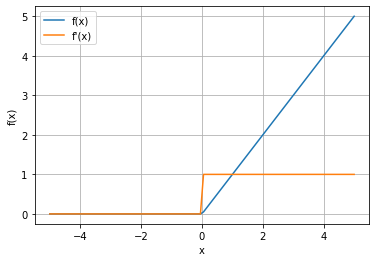

In [13]:
# ReLU, looks linear but allows very flexible linear boundaries to be drawn (ie. triangles or rectangles...)

def ReLU(x):
    return np.maximum(0, x)  # 0 if input is negative, x if input is positive


def ReLU_derivative(x):
    return (ReLU(x) > 0).astype(int)


plt.plot(range_for_demo, ReLU(range_for_demo), label="f(x)")
plt.plot(range_for_demo, ReLU_derivative(range_for_demo), label="f'(x)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

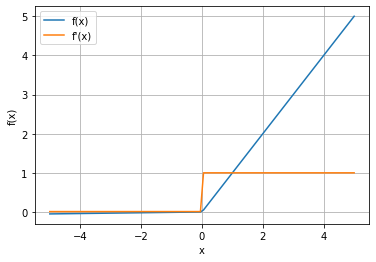

In [14]:
# Leaky ReLU, like ReLU but negative values still appear as 0.01 times that value. Gives negative inputs more flexibility

def leakyReLU(x):
    return np.where(x > 0, x, x*0.01)  # 0.01*x if input is negative, x if input is positive

def leakyReLU_derivative(x):
    return np.where(x > 0, 1, 0.01)


plt.plot(range_for_demo, leakyReLU(range_for_demo), label="f(x)")
plt.plot(range_for_demo, leakyReLU_derivative(range_for_demo), label="f'(x)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

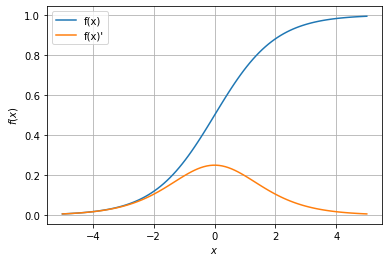

In [15]:
# Sigmoid function, notice how it is clearly non-linear and squeezes all input values between 0 and 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1-s)

plt.plot(range_for_demo, sigmoid(range_for_demo), label='f(x)')
plt.plot(range_for_demo, sigmoid_derivative(range_for_demo), label="f(x)'")
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.show()

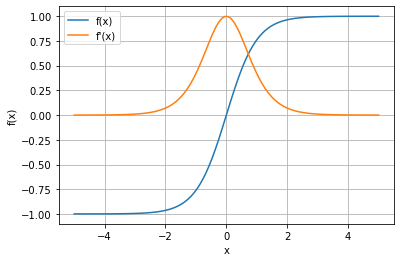

In [16]:
# Hyperbolic tangent, this function squeezes all values between -1 and 1

def tanH(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))


def tanH_derivative(x):
    return 1-tanH(x)**2

plt.plot(range_for_demo, tanH(range_for_demo), label="f(x)")
plt.plot(range_for_demo, tanH_derivative(range_for_demo), label="f'(x)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Let's quickly refresh what each neuron's input is for the fifth observation. Let's look at the first five neurons.

In [17]:
hiddenLayer_inputs[:5] 

array([[ 1.74552453],
       [ 1.19415323],
       [-0.81280847],
       [-1.2191316 ],
       [ 0.1765132 ]])

Now let's pass our hidden layer's inputs through the activation function. You can try doing this with a leaky ReLU as well!

In [18]:
hiddenLayer_outputs = ReLU(hiddenLayer_inputs)
hiddenLayer_outputs[:5]  # these are the first five nodes' output values (after activation)

array([[1.74552453],
       [1.19415323],
       [0.        ],
       [0.        ],
       [0.1765132 ]])

## Finish the prediction for first forward pass of fifth observation
We will now try to make predictions using the architecture we have specified and the weights (coefficients) that we have chosen. We run observatiosn into the model and the first predictions will be completed with our initialized weights for the first go. We will then discuss how to optimize weights in the Back Propagation section.

In [19]:
outputLayer_inputs = np.dot(weightsHiddenToOutput, hiddenLayer_outputs) + biasHiddenToOutput  # sum of next layer of weights * respective node then add bias
outputLayer_inputs  # If this number had the opposite sign, what do we expect a ReLU activation to do in the next step?

array([[-0.97237793]])

Now that we have calculated the inputs for the output layer, now time to apply the final activation to get the output of the output layer (prediction).

In [20]:
outputLayer_outputs = ReLU(outputLayer_inputs)  # Apply activation for output layer's output
outputLayer_outputs

array([[0.]])

Let's check the result and compare it with the 5th observation's true target value.

In [21]:
target

array([[64.42142556]])

Did you expect much with randomly initialized weights for our first pass? Don't worry, the magic of neural networks is in the next part of the tutorial on back propagation. This can be complex but it is critical for the optimization of weights in the network to achieve the accuracy that neural networks are known for.

## First forward pass predictions for all observations

If you want to use the code above to predict for all observations, you just need some minor tweaks.

In [22]:
# Forward pass
inputs = np.array(X).reshape((inputLayer_size, n))  # whole dataset, use n instead of 1
target = y.reshape((outputLayer_size, n))  # true value of target, use n instead of 1
hiddenLayer_inputs = np.dot(weightsInputToHidden, inputs) + biasInputToHidden  # first hidden layer inputs
hiddenLayer_outputs = ReLU(hiddenLayer_inputs)  # hidden layer output (after activation)
outputLayer_inputs = np.dot(weightsHiddenToOutput, hiddenLayer_outputs) + biasHiddenToOutput  # input to output layer
outputLayer_outputs = ReLU(outputLayer_inputs)  # activation applied to output layer = prediction!
outputLayer_outputs.shape  # shape of first forward pass predictions

(1, 1000)

In the next notebook, we will discuss the role of measuring loss in the optimization of the network which is a bit more complex than what we have covered previous models in BADS.

# Overview of Forward Pass
Quick reiteration of what happened in the forward pass:
- We can liken a single node in a layer of neural network to a linear regression (weights = coefficients)
- If we use more hidden layers, we may capture more complex relations in the data
- We chose an input layer size equal to the number of features
- We chose an output layer size equal to the number of values to predict
- We chose a hidden layer size and depth to experiment with
- We chose an activation function to add more non-linearity
- We initialize with some set of weights (ie. coefficients)
- We run the model with training data and observe what it predicts as targets

In subsequent notebooks, we will go over back propagation and fitting the neural network for classification problems.